In [1]:
import json
import sys
import pandas as pd
import rasterio
from rasterio.mask import mask
from libtiff import TIFF
import sys
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
import pickle
import h5py
import scipy.misc
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt

In [2]:
inputFolder='../temporalResults/All_Images_2003/'
onlyfiles = [f for f in listdir(inputFolder) if isfile(join(inputFolder, f))]

In [3]:
wid_list=[]
len_list=[]
count_com=0
for currFile1 in onlyfiles:
    count_com+=1
    if(count_com%10000==0):
        print (count_com)
    #currFile=(inputFolder+onlyfiles[0])
    currFile=(inputFolder+currFile1)
    tif = TIFF.open(currFile, mode='r')
    strInfo=tif.info().splitlines()
    # print(strInfo)
    strInfoEx=strInfo[1]+strInfo[2]
    # print(strInfoEx)
    img_wid=[int(s) for s in strInfo[1].split() if s.isdigit()][0]
    img_len=[int(s) for s in strInfo[2].split() if s.isdigit()][0]
    wid_list.append(img_wid)
    len_list.append(img_len)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


/home/satbigvm/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'widthVillage')

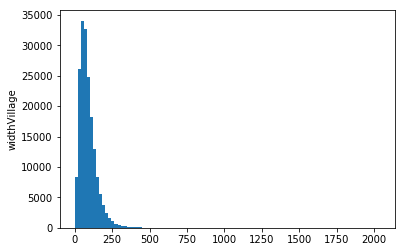

In [9]:
%matplotlib inline
plt.hist(wid_list, normed=False, bins=100)
plt.ylabel('widthVillage')

In [5]:
checkValue=[50,100,150,200,250,300]
wid_list_np = np.array(wid_list)
for c_check in checkValue:
    print('Percentage of Villages with Width greater than ',c_check,' is ', sum(wid_list_np > c_check)*100.0/(len(wid_list_np)*1.0), '%')

Percentage of Villages with Width greater than  50  is  73.66003483497343 %
Percentage of Villages with Width greater than  100  is  32.63828220724062 %
Percentage of Villages with Width greater than  150  is  12.137845396453866 %
Percentage of Villages with Width greater than  200  is  4.474151240927248 %
Percentage of Villages with Width greater than  250  is  1.7170235328377317 %
Percentage of Villages with Width greater than  300  is  0.7170290273130367 %


In [6]:
checkValue=[50,100,150,200,250,300]
wid_list_np = np.array(len_list)
for c_check in checkValue:
    print('Percentage of Villages with Length greater than ',c_check,' is ', sum(wid_list_np > c_check)*100.0/(len(wid_list_np)*1.0), '%')

Percentage of Villages with Length greater than  50  is  69.77653968934237 %
Percentage of Villages with Length greater than  100  is  28.836105296124746 %
Percentage of Villages with Length greater than  150  is  10.32247075565519 %
Percentage of Villages with Length greater than  200  is  3.652177735287169 %
Percentage of Villages with Length greater than  250  is  1.3362563941956362 %
Percentage of Villages with Length greater than  300  is  0.5846121724605908 %


In [7]:
area_array=np.multiply(np.array(len_list), np.array(wid_list))
checkValue=[64,100,150,200,224]
wid_list_np = np.array(area_array)
for c_check in checkValue:
    print('Percentage of Villages with Area greater than ',c_check,' box is ', sum(wid_list_np > (c_check*c_check))*100.0/(len(wid_list_np)*1.0), '%')

Percentage of Villages with Area greater than  64  box is  59.17330124559755 %
Percentage of Villages with Area greater than  100  box is  29.90258295284092 %
Percentage of Villages with Area greater than  150  box is  9.893352234328383 %
Percentage of Villages with Area greater than  200  box is  3.2269053466739193 %
Percentage of Villages with Area greater than  224  box is  1.9368025450409614 %
